# Tiny diffusion

### Imports

In [1]:
from source.datasets import get_dataloader_nums, get_dataloader_grecs
from source.model import ModelWithLabels, train_with_labels
from source.NoiseScheduler import NoiseScheduler
from source.utils import sample_with_label, make_gif_nums, make_gif_grecs

from dataclasses import dataclass

import matplotlib.pyplot as plt

import torch

device = None
if torch.cuda.is_available():               # Apple Silicon
    device = torch.device('cuda')
elif torch.backends.mps.is_available():     # CUDA
    device = torch.device('mps')
else:                                       # CPU
    device = torch.device('cpu')

print(f'Using device: {device}')

Using device: mps


### Model configuration

In [2]:
@dataclass
class ModelConfig:
    # general
    device: str

    # architecture
    time_embed_scale: float = 25.0
    input_embed_scale: float = 25.0
    time_embed_dim: int = 256
    input_embed_dim: int = 256
    n_layers: int = 4
    hidden_dim: int = 512
    label_dim: int = 10

    # noise schedule
    beta0: float = 1e-4
    betaT: float = 2e-2
    T: int = 400
    schedule_type: str = "sigmoid"

    # training
    batch_size: int = 256
    n_epochs: int = 200
    lr: float = 5e-4
    dropout: float = 0.2

In [3]:
config = ModelConfig(device=device)

### Training and sampling example on the nums dataset

In [4]:
dataloader = get_dataloader_nums("data/nums", batch_size=ModelConfig.batch_size)
model = ModelWithLabels(config).to(device)
noise_scheduler = NoiseScheduler(config)

In [5]:
losses = train_with_labels(model, config, noise_scheduler, dataloader)

Epoch 0 loss=0.43550 lr=0.0005
Epoch 20 loss=0.30344 lr=0.0005


KeyboardInterrupt: 

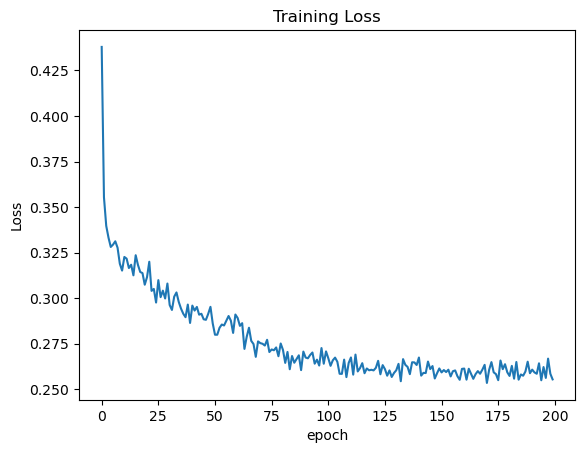

In [11]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [12]:
frames = [sample_with_label(model, config, noise_scheduler, 2000, n) for n in range(config.label_dim)]

In [13]:
make_gif_nums(frames, "static/nums.gif")

MovieWriter imagemagick unavailable; using Pillow instead.


### Training and sampling example on the grecs dataset

In [14]:
config.label_dim = 24
dataloader = get_dataloader_grecs("data/grec", batch_size=ModelConfig.batch_size)
model = ModelWithLabels(config).to(device)
noise_scheduler = NoiseScheduler(config)

In [15]:
losses = train_with_labels(model, config, noise_scheduler, dataloader)

Epoch 0 loss=0.35752 lr=0.0005
Epoch 20 loss=0.26057 lr=0.0005
Epoch 40 loss=0.25449 lr=0.0005
Epoch 60 loss=0.24211 lr=0.0005
Epoch 80 loss=0.24225 lr=0.0005
Epoch 100 loss=0.22893 lr=0.00025
Epoch 120 loss=0.22771 lr=0.00025
Epoch 140 loss=0.22856 lr=0.000125
Epoch 160 loss=0.22534 lr=0.000125
Epoch 180 loss=0.21896 lr=6.25e-05


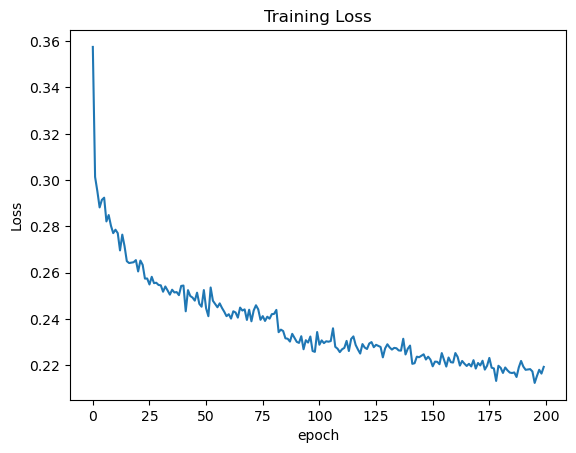

In [16]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
frames = [sample_with_label(model, config, noise_scheduler, 4000, n) for n in range(config.label_dim)]

In [18]:
make_gif_grecs(frames, "static/grecs.gif")

MovieWriter imagemagick unavailable; using Pillow instead.
